In [8]:
# Data Summary: Description of the Data. Dataset size, key variables, target variable, etc.

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv("/Users/jongseok/downloads/carprice_assignment.csv")

In [11]:
# make a copy just in case

original_data = data.copy()

In [12]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
data.info()

# it looks like we have 25 features and 1 target (price)
# there are no missing values across all variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
data.describe()
# it looks like the average price for a car is ~13000 
# the min is ~5000
# the max is ~45000

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
data.isnull().sum()

# we confirm that there is no missing values. 

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
# Data cleaning and wrangling

In [17]:

sum(data.duplicated(subset = "car_ID"))


0

In [18]:
data["CarName"].unique()

# we can see that the carname has the brand attached to it

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [19]:
# lets split the brand with the car name up

data["brand"] = data["CarName"].str.split(" ").str.get(0).str.lower()


In [20]:
data["brand"].unique()

# lets check the list of brand names for any typos

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [21]:
# we can see some typos like porcsche and toyouta

data["brand"] = data["brand"].replace(["maxda"], "mazda")
data["brand"] = data["brand"].replace(["porcshce"], "porsche")
data["brand"] = data["brand"].replace(["toyouta"], "toyota")
data["brand"] = data["brand"].replace(["vokswagen", "vw"], "volkswagen")

In [22]:
data["brand"].unique()

# recheck to see if fixed
# it is fixed

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [23]:
import seaborn as sns
import matplotlib.pylab as plt

/var/folders/gk/sklrv7fn4hqgq0y17q3njx_40000gn/T/ipykernel_63341/3058996943.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(x = data["brand"], order = pd.value_counts(data["brand"]).index)


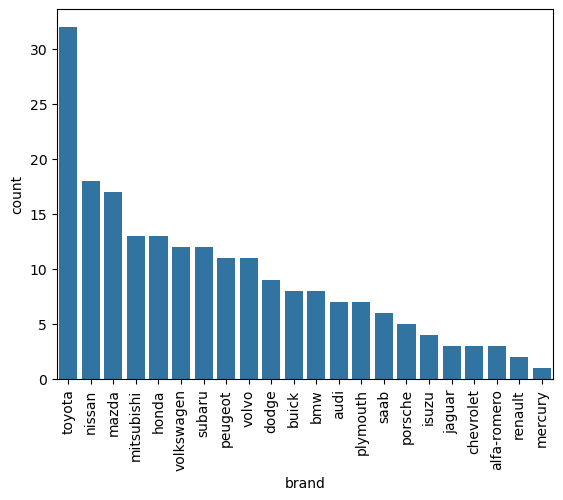

In [24]:
sns.countplot(x = data["brand"], order = pd.value_counts(data["brand"]).index)
plt.xticks(rotation=90)
plt.show()


In [25]:
data["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2])

In [26]:
data_brand_avg_price = data[["brand", "price"]].groupby("brand", as_index = False).mean().rename(columns = {"price":"brand_avg_price"})
data_brand_avg_price.head()

,brand,brand_avg_price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000


In [27]:
data = data.merge(data_brand_avg_price, on = "brand")
# we are merging the table data_brand_avg_price we just made with data
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714


In [28]:
data["brand_avg_price"].describe()

# check the statistics for brand_avg_price

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

In [29]:
def categorize_price(x):
    if x<10000:
        return "Budget"
    elif x < 20000:
        return "Mid_Range"
    else:
        return "Luxury"

data["brand_category"] = data["brand_avg_price"].apply(categorize_price) 


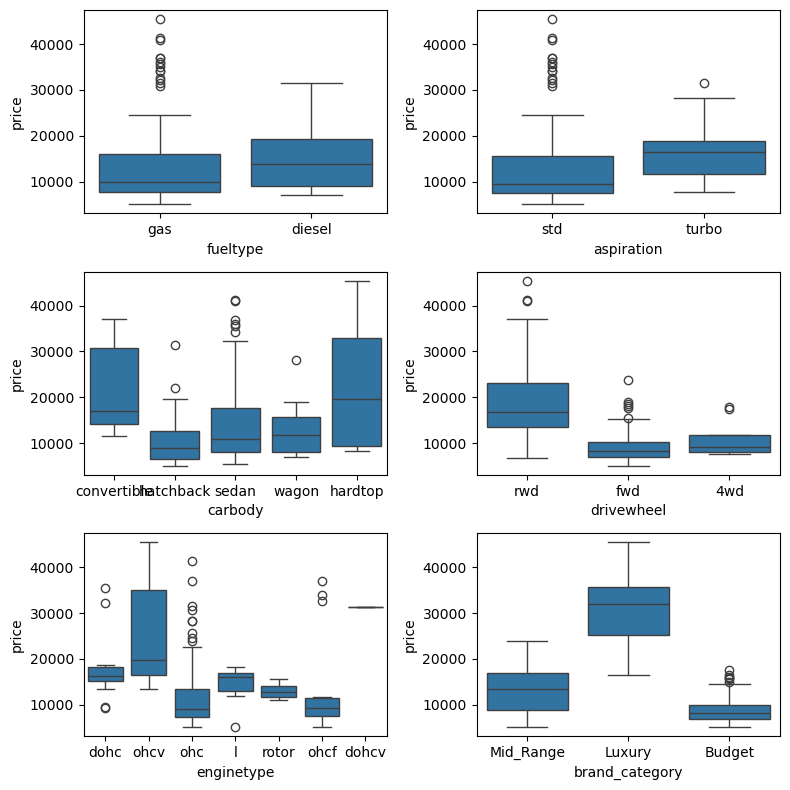

In [30]:
plt.figure(figsize = (8,8))

plt.subplot(3,2,1)
sns.boxplot(x = "fueltype", y = "price", data = data)
plt.subplot(3,2,2)
sns.boxplot(x = "aspiration", y = "price", data = data)
plt.subplot(3,2,3)
sns.boxplot(x = "carbody", y = "price", data = data)
plt.subplot(3,2,4)
sns.boxplot(x = "drivewheel", y = "price", data = data)
plt.subplot(3,2,5)
sns.boxplot(x = "enginetype", y = "price", data = data)
plt.subplot(3,2,6)
sns.boxplot(x = "brand_category", y = "price", data = data)
plt.tight_layout()


# box plots of all the categorical variables

In [31]:
corr_matrix = data.corr(numeric_only = True)


corr_matrix["price"].sort_values(ascending=False)


price               1.000000
brand_avg_price     0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

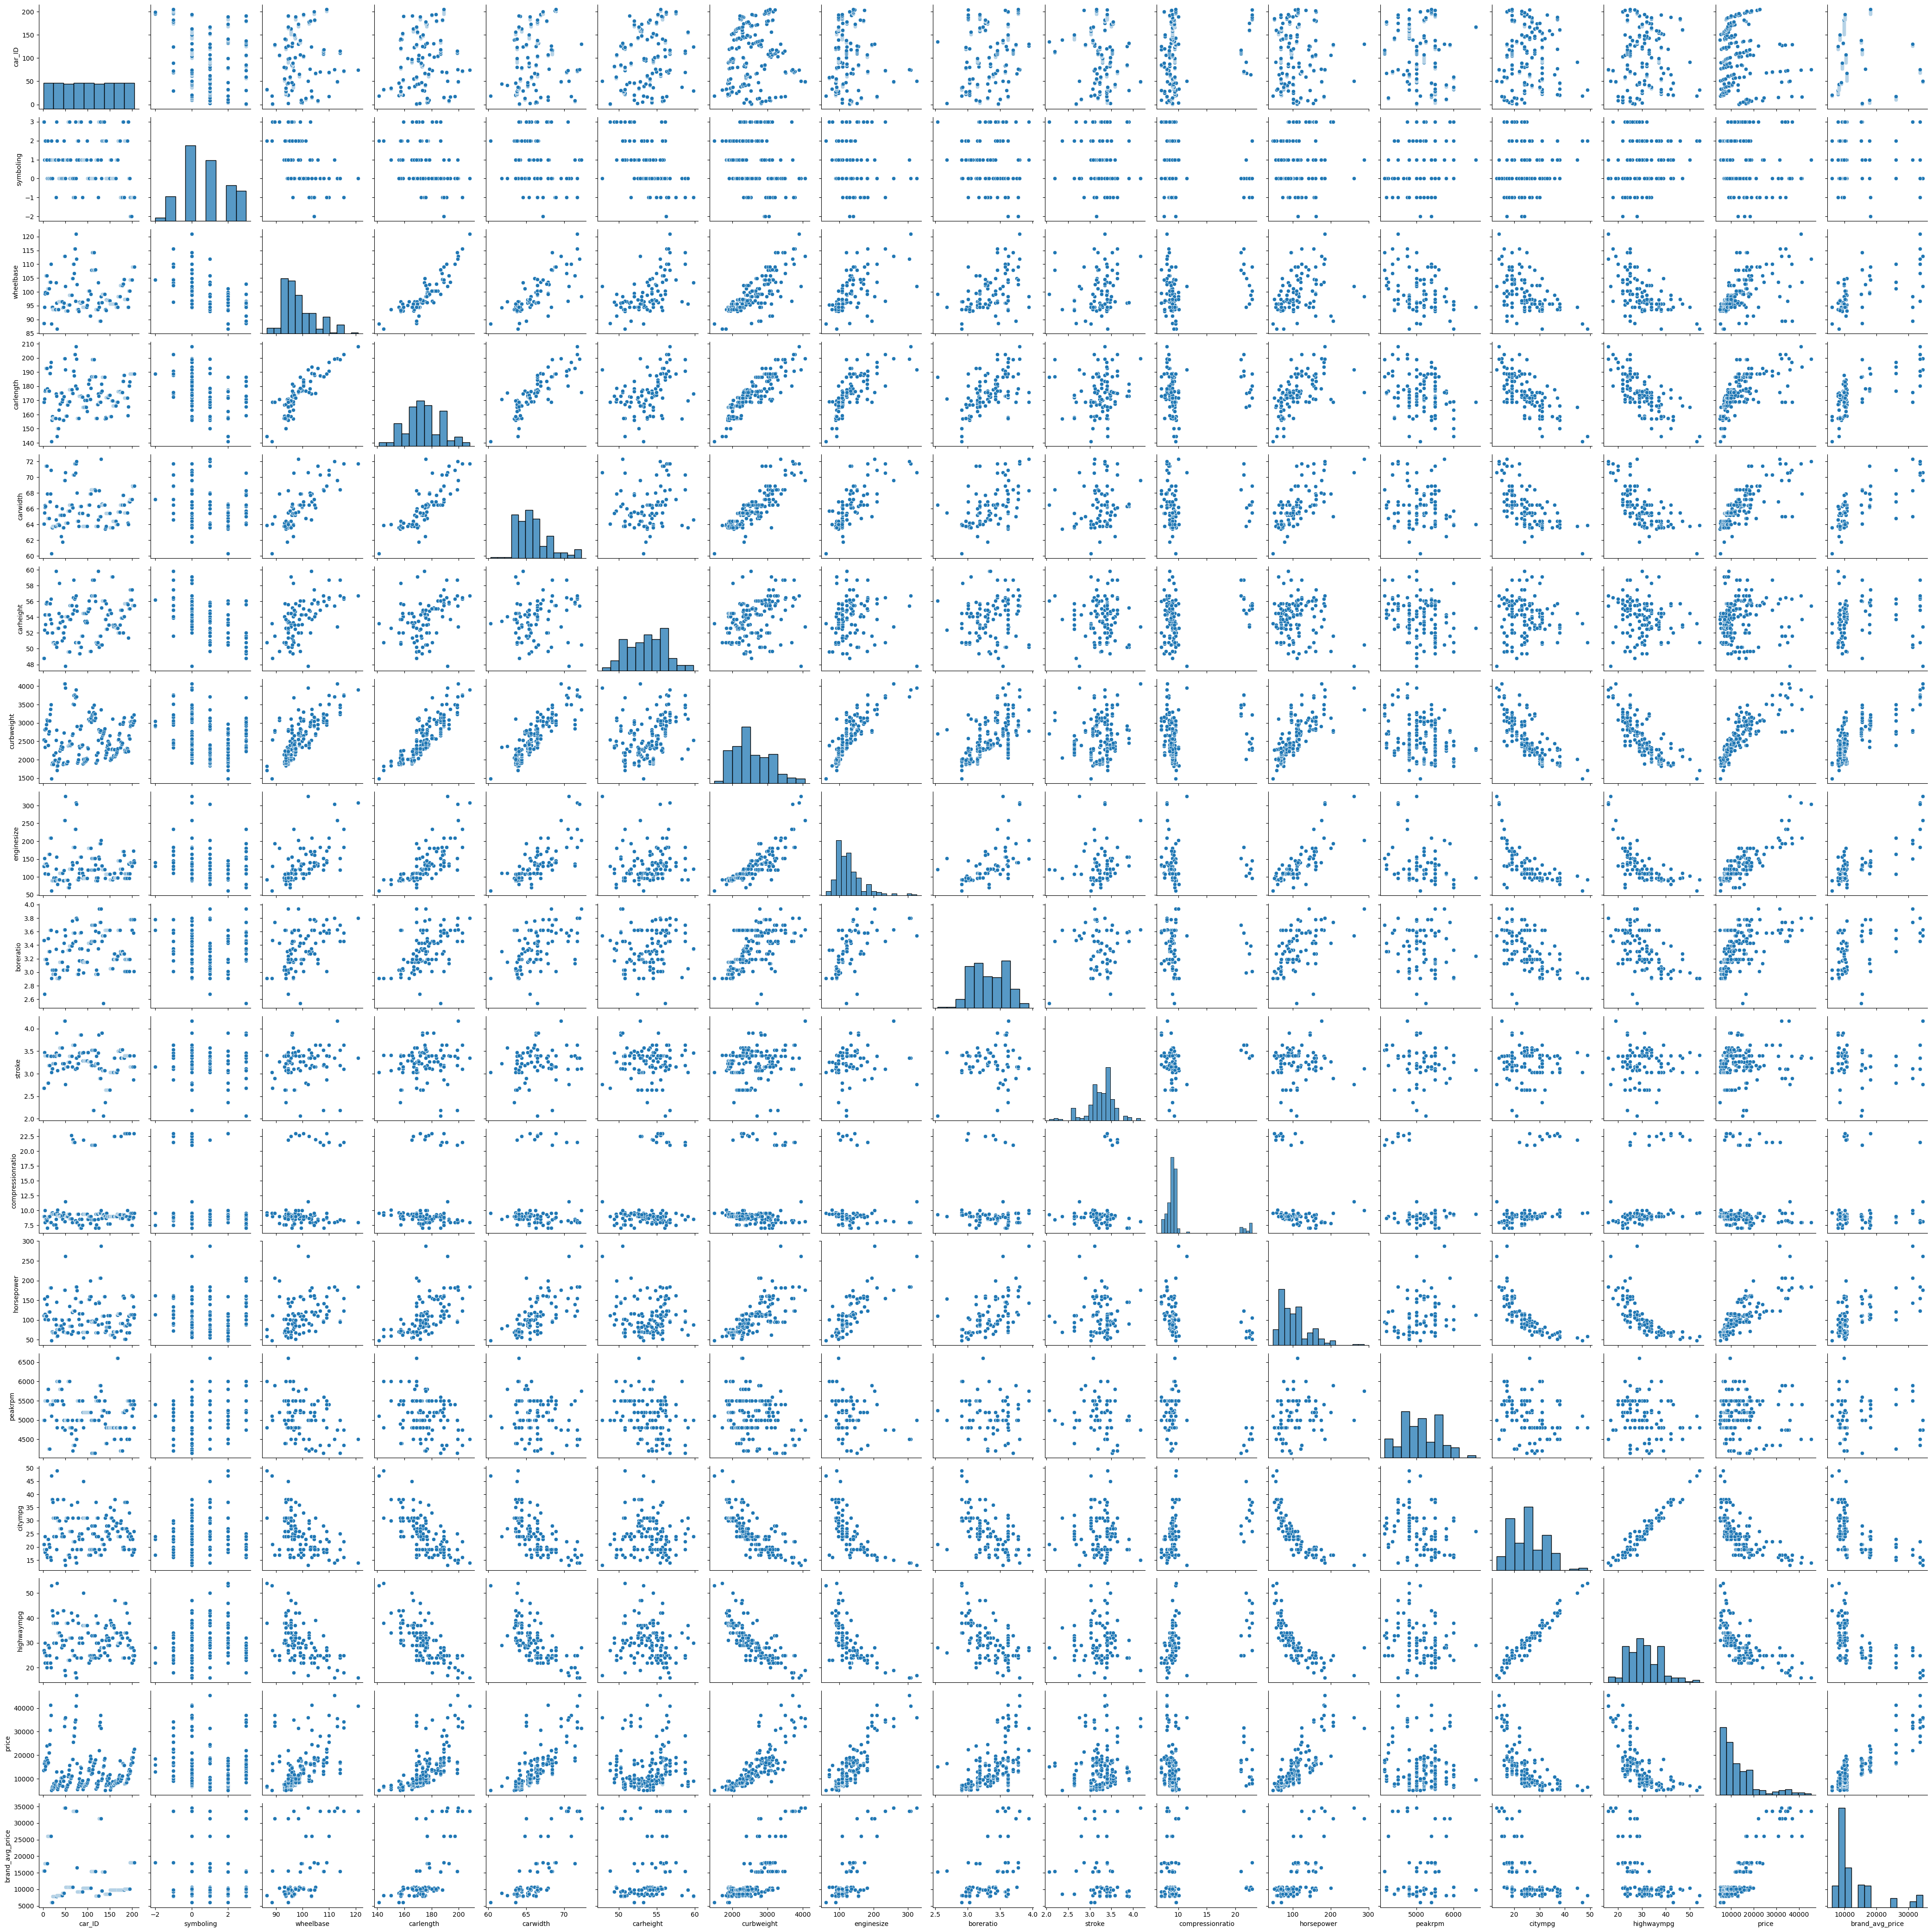

In [32]:
sns.pairplot(data)
plt.show()

# pairplot of all the variables with each other


In [33]:
# Move onto Testing assumption for linear regression

# 1. Linearity: the relationship between features and target must be linear
# 2. Independence of Errors: the errors must be indepedent of each other (errors = actual - predicted)
# 3. Homoscedasticity: the variance of errors are constant across all values of x (errors = actual - predicted)
# 4. Normality of Errors: Errors are normally distributed (errors = actual - predicted)
# 5. No multicollinearity: features (columns) are not highly correlated with each other

<Axes: xlabel='carwidth', ylabel='price'>

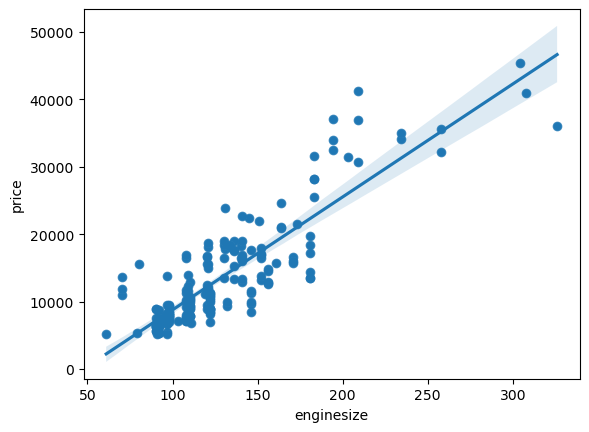

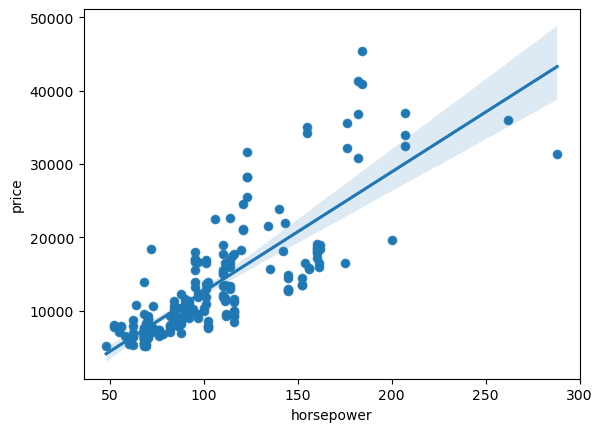

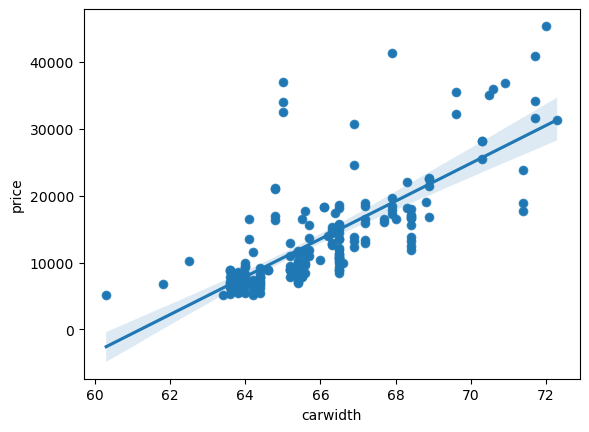

In [34]:
# 1. Linearity: the relationship between features and target must be linear

sns.scatterplot(x = data["enginesize"], y = data["price"], data = data)
sns.regplot(x = data["enginesize"], y = data["price"], data = data)

plt.figure()
sns.scatterplot(x = data["horsepower"], y = data["price"], data = data)
sns.regplot(x = data["horsepower"], y = data["price"], data = data)

plt.figure()
sns.scatterplot(x = data["carwidth"], y = data["price"], data = data)
sns.regplot(x = data["carwidth"], y = data["price"], data = data)

# start by checking enginesize, horsepower, and carwidth for linearity
# they seem decently linear

<Axes: xlabel='enginesize', ylabel='price'>

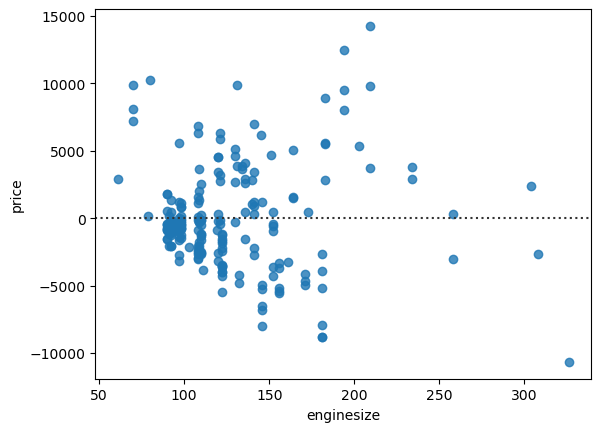

In [35]:
# 3. Homoscedasticity: the variance of errors are constant across all values of x (errors = actual - predicted)

sns.residplot(x = data["enginesize"], y = data["price"], data = data)

# here we can see that there is a funnel like shape and not even distribution so this homoscedasticity does not seem to be met

<Axes: xlabel='price', ylabel='Count'>

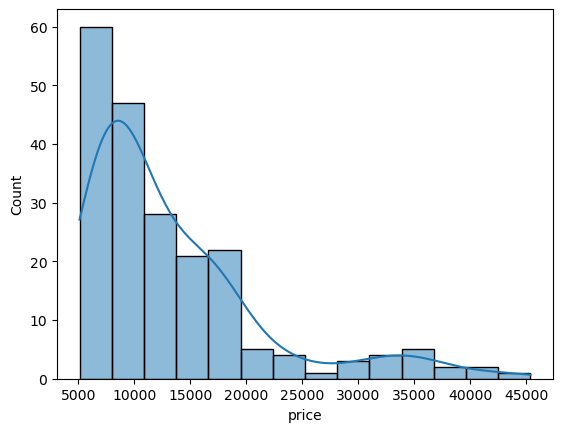

In [36]:
# 4. Normality of Errors: Errors are normally distributed (errors = actual - predicted)

sns.histplot(x = "price", data = data, kde = True)

# not normally distributed (right skewed)

In [37]:
from scipy import stats

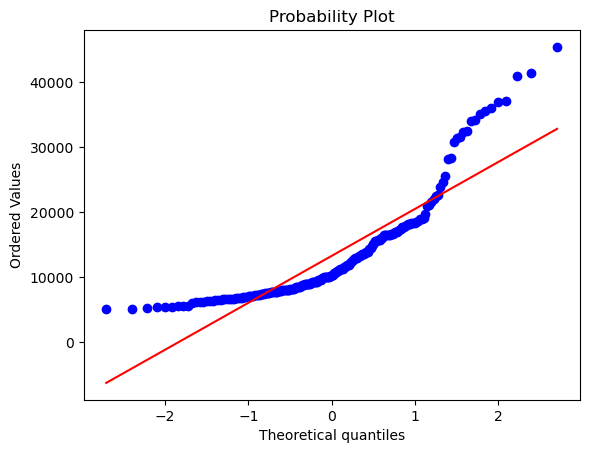

In [38]:
# draw a qq plot

stats.probplot(x = data["price"], plot=plt)

plt.show()

# right skewed

<Axes: ylabel='price'>

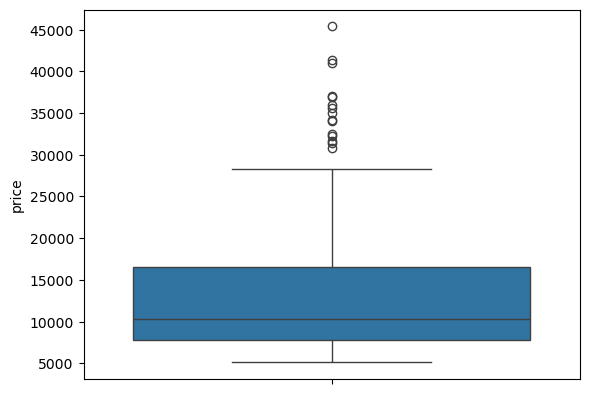

In [39]:
sns.boxplot(y = "price", data = data)

# outliers in the "price" making linearity less likely

In [40]:
from scipy.stats.mstats import normaltest

In [41]:

normaltest(data["price"])

# we can see its definitely not normal

NormaltestResult(statistic=np.float64(77.37514013383584), pvalue=np.float64(1.5783445016767577e-17))

In [42]:
import numpy as np

In [43]:
# lets log transform to make it reduce skew/outliers

data["price"] = np.log1p(data["price"])

<Axes: xlabel='price', ylabel='Count'>

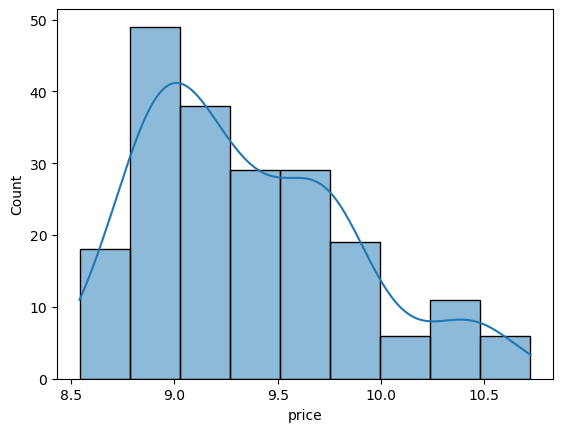

In [44]:
sns.histplot(x = "price", data = data, kde = True)

# we can see the histplot is much closer to being normal (although not quite normal yet)

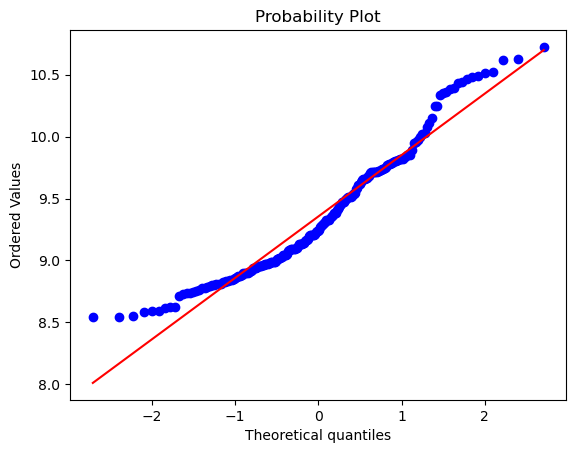

In [45]:
stats.probplot(x = data["price"], plot=plt)

plt.show()

# we can see the qq plot is much closer to being normal (although not quite normal yet)

<Axes: ylabel='price'>

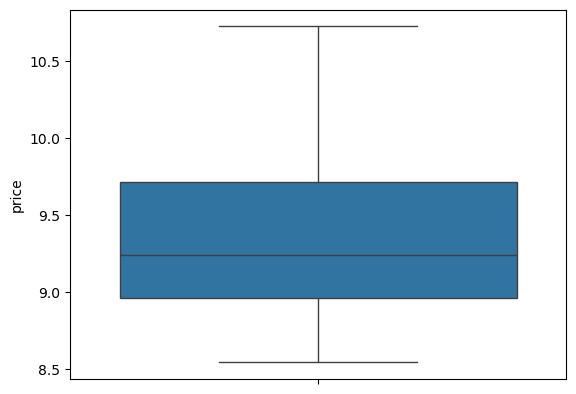

In [46]:
sns.boxplot(y = "price", data = data)

# and no more outliers

In [47]:
normaltest(data["price"])

# we can see the normaltest p-value is much closer to being normal (although not quite normal yet)

NormaltestResult(statistic=np.float64(14.105574503272747), pvalue=np.float64(0.0008649946364941867))

In [48]:
from scipy.stats import boxcox

In [49]:
# do boxcox real quick just to see normal result 

bc_result = boxcox(data["price"])
boxcox_price = bc_result[0]
normaltest(boxcox_price)

# the p-value is 0.0004 vs 0.0008 for log1p so the log1p is still better

NormaltestResult(statistic=np.float64(15.647610252489418), pvalue=np.float64(0.00040009636545064437))

<Axes: >

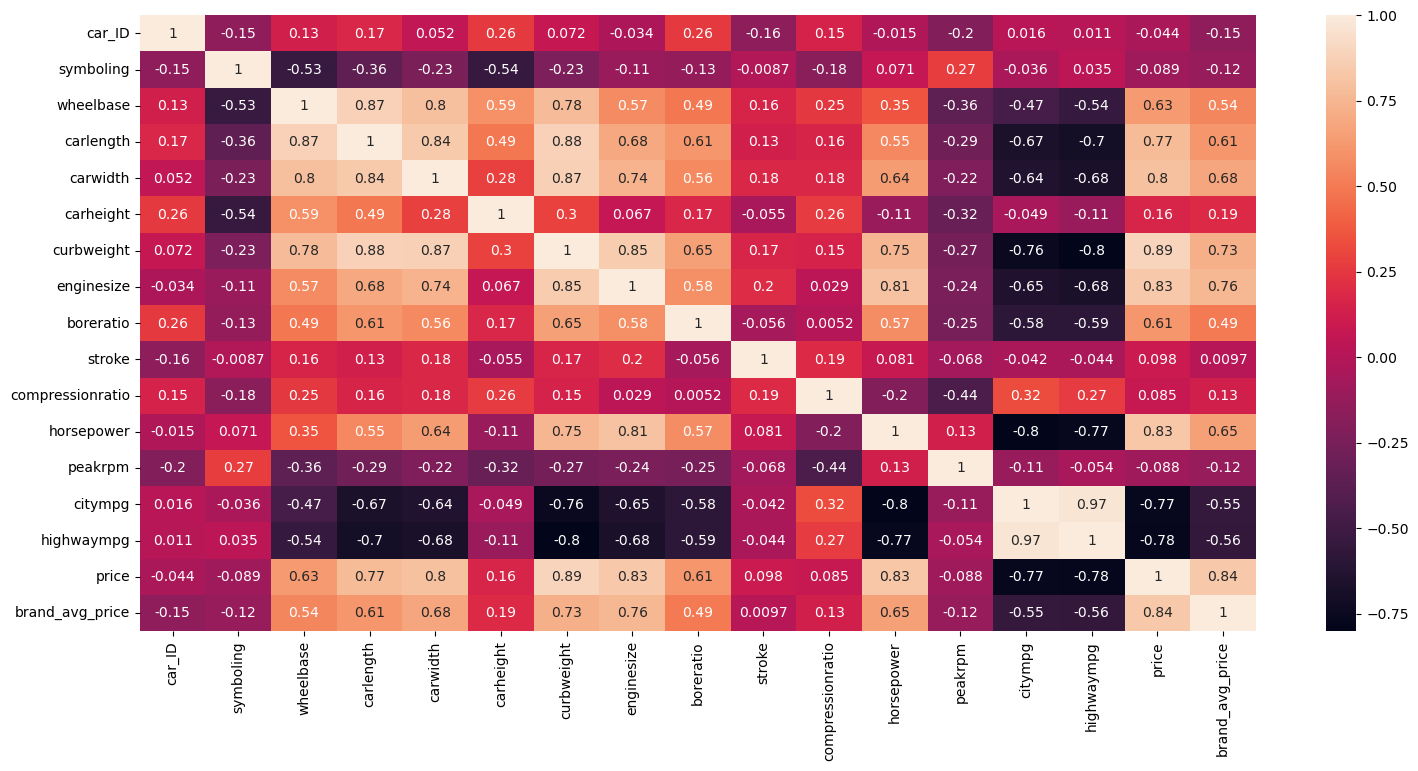

In [50]:
# 5. No multicollinearity: features (columns) are not highly correlated with each other
plt.figure(figsize = (18,8))
sns.heatmap(data.corr(numeric_only = True), annot = True)

# there is definitely multicollinearity between some features

In [51]:
# variables found to be significant were
# numerical: Curbweight, Car Length, Car width, Engine Size, Boreratio, Horse Power, Wheel base, City mpg (miles per gallon), 
# Highway mpg (miles per gallon)
# categorical: Engine Type, Fuel type, Car Body, Aspiration, Cylinder Number, Drivewheel, Brand Category

selected = data[["price", 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                'carlength','carwidth','citympg','highwaympg']]

selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


In [52]:
categorical_columns = []

for col in selected.columns:
    if selected[col].dtype == "object":
        categorical_columns.append(col)

In [53]:
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

In [54]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']



numerical_columns = list(set(columns)-set(categorical_columns))


In [55]:
numerical_columns

['carwidth',
 'carlength',
 'enginesize',
 'citympg',
 'wheelbase',
 'price',
 'boreratio',
 'highwaympg',
 'horsepower',
 'curbweight']

In [56]:
# lets split x and y

In [57]:
x = selected.drop("price", axis = 1)
x.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
1,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
2,gas,std,hatchback,rwd,94.5,Mid_Range,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26
3,gas,std,sedan,fwd,99.8,Mid_Range,2337,ohc,four,109,3.19,102,176.6,66.2,24,30
4,gas,std,sedan,4wd,99.4,Mid_Range,2824,ohc,five,136,3.19,115,176.6,66.4,18,22


In [58]:
y = selected["price"].copy()

# we do copy() so that modifying selected does not accidentally modify y

y.head()

0    9.510149
1    9.711176
2    9.711176
3    9.543306
4    9.767152
Name: price, dtype: float64

In [59]:
for column in categorical_columns:
    print(column)
    print(x[column].value_counts())


fueltype
fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
aspiration
std      168
turbo     37
Name: count, dtype: int64
carbody
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
brand_category
brand_category
Budget       95
Mid_Range    86
Luxury       24
Name: count, dtype: int64
enginetype
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


In [60]:
# note: rare categories can cause issues depending on how data is split/encoded

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [62]:
one_hot = ColumnTransformer(
    transformers = [("one_hot", OneHotEncoder(), categorical_columns)],
    remainder = "passthrough")

x = one_hot.fit_transform(x)

type(x)

numpy.ndarray

In [63]:
names = one_hot.get_feature_names_out()

names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__brand_category_Budget', 'one_hot__brand_category_Luxury',
       'one_hot__brand_category_Mid_Range', 'one_hot__enginetype_dohc',
       'one_hot__enginetype_dohcv', 'one_hot__enginetype_l',
       'one_hot__enginetype_ohc', 'one_hot__enginetype_ohcf',
       'one_hot__enginetype_ohcv', 'one_hot__enginetype_rotor',
       'one_hot__cylindernumber_eight', 'one_hot__cylindernumber_five',
       'one_hot__cylindernumber_four', 'one_hot__cylindernumber_six',
       'one_hot__cylindernumber_three', 'one_hot__cylindernumber_twelve',
       'one_hot__cylindernumber_two', 'remainder__wheelbase',
       'remain

In [64]:
temp = []

for name in names:
    if "__" in name:
        part = name[name.find("__")+2:]
    else: 
        part = name
    temp.append(part)

column_names = []

for name in temp:
    if "_" in name:
        final = name[name.find("_")+1:]
    else:
        final = name
    column_names.append(final)

column_names

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'category_Budget',
 'category_Luxury',
 'category_Mid_Range',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

In [65]:
x = pd.DataFrame(data = x, columns = column_names)

x.head()

# this is the final cleaned car data

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,two,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0


In [66]:
# train test split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


In [69]:
x_train

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,two,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
40,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,96.5,2372.0,110.0,3.15,86.0,175.4,62.5,27.0,33.0
60,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,98.8,2410.0,122.0,3.39,84.0,177.8,66.5,26.0,32.0
56,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,95.3,2380.0,70.0,3.33,101.0,169.0,65.7,17.0,23.0
101,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,100.4,3095.0,181.0,3.43,152.0,181.7,66.5,17.0,22.0
86,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,96.3,2405.0,122.0,3.35,88.0,172.4,65.4,25.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,110.0,3515.0,183.0,3.58,123.0,190.9,70.3,22.0,25.0
192,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,100.4,2579.0,97.0,3.01,68.0,180.2,66.9,33.0,38.0
117,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,108.0,3130.0,134.0,3.61,142.0,186.7,68.3,18.0,24.0
47,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,113.0,4066.0,258.0,3.63,176.0,199.6,69.6,15.0,19.0


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
ss=StandardScaler()
ss

,copy,True
,with_mean,True
,with_std,True


In [72]:
x_train = ss.fit_transform(x_train)


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression()
lm.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
x_test = ss.transform(x_test)

# DO NOT fit the test set. that will be letting the model “see” test data statistics
# we standardize the test set too

In [76]:
car_price_predictions = lm.predict(x_test)
car_price_predictions

array([ 8.87382614,  9.76337557,  9.37628995,  8.20831094,  9.2575611 ,
        9.35009015,  8.6897461 ,  8.80073274,  9.65147217,  8.81789469,
        9.89388951, 11.24664201,  9.44958425,  9.48134176,  8.7288755 ,
        9.27222641,  9.08272815,  9.59966453,  9.00081762,  8.78932932,
        9.23218265,  9.57680799,  9.10528681,  9.32534749,  9.77750121,
        8.84088678,  8.88840985,  9.61754068,  8.8845337 ,  8.87834548,
        9.14365843,  9.25692864,  9.95931864,  9.11095495,  8.89431439,
       10.41505217,  9.46108489,  9.69179704,  8.76436612, 10.39861695,
        8.71746913,  9.46030926, 10.49094553,  9.43582935,  9.2886159 ,
        8.85658985,  8.8322295 ,  9.46213505,  9.21401668,  9.16516759,
        9.87654629,  8.85514712,  8.94939403,  9.15904737,  9.9613356 ,
        9.75398217,  9.19295432, 10.00573186,  9.19360697,  8.79402268,
        8.36319362,  9.52018116])

In [77]:
# now lets do some model evaluation

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
# mse is one of the most common ways to evalute model performance

mse = mean_squared_error(y_test, car_price_predictions)
mse

# sqrt of (0.041) -> 0.20 -> e^0.20 (because we are in log scale) = 1.22 
# this means the predictions are off by about 22% on average
# solid for real world data

0.041036428486608864

In [80]:
lm.score(x_test, y_test)

# we have an excellent score
# 1- 0.84 = 0.16 only 16% of variation in price is unexplained noise/error

0.8405040984341619

In [81]:
# pipeline version

In [82]:
from sklearn.pipeline import Pipeline

In [83]:
pipe = Pipeline(steps = 
                [("scaler", StandardScaler()), ("lm", LinearRegression())]
               )

In [84]:
pipe.fit(x_train, y_train)

,steps,"[('scaler', ...), ('lm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [85]:
car_price_predictions = pipe.predict(x_test)

In [86]:
mse = mean_squared_error(y_test, car_price_predictions)
mse

0.04103642848660898

In [87]:
rmse = np.sqrt(mse)
rmse

# quite good rmse

np.float64(0.20257450107703334)

In [88]:
pipe.score(x_test,y_test)

0.8405040984341613

Text(0, 0.5, 'Predicted')

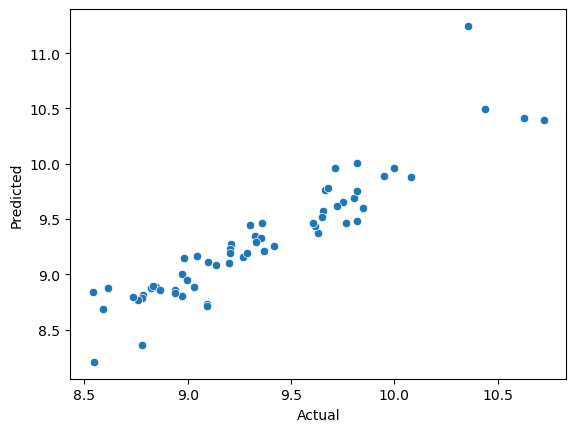

In [89]:
# plot predicted vs actual

sns.scatterplot(x = y_test, y = car_price_predictions)

plt.xlabel("Actual")
plt.ylabel("Predicted")

# this model: points tightly clustered on y = x
# result is not bad

In [90]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   diesel              205 non-null    float64
 1   gas                 205 non-null    float64
 2   std                 205 non-null    float64
 3   turbo               205 non-null    float64
 4   convertible         205 non-null    float64
 5   hardtop             205 non-null    float64
 6   hatchback           205 non-null    float64
 7   sedan               205 non-null    float64
 8   wagon               205 non-null    float64
 9   4wd                 205 non-null    float64
 10  fwd                 205 non-null    float64
 11  rwd                 205 non-null    float64
 12  category_Budget     205 non-null    float64
 13  category_Luxury     205 non-null    float64
 14  category_Mid_Range  205 non-null    float64
 15  dohc                205 non-null    float64
 16  dohcv   

In [91]:
# lets try polynomial regression on our one hot encoded data

In [92]:
# drop category_Budget, category_Luxury, and category_Mid_Range for now and make a new version of x 

In [93]:
x_v2 = x.drop(["category_Budget", "category_Luxury", "category_Mid_Range"], axis = 1)

In [94]:
x_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

In [95]:
# lets refuse this with our y 

data_v2 = pd.concat([x_v2, original_data["price"]], axis=1)

data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

In [96]:
# and then just make a copy of y called y_v2 so we keep all the naming consistent
y_v2 = original_data["price"].copy()
y_v2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: price
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
# quick cross validation with 3 folds
lr = LinearRegression()

scores = cross_val_score(lr, x_v2, y_v2, scoring ="r2", cv=3)
scores

array([ 0.81523496,  0.72623558, -0.08699892])

In [99]:
# quick mean and std of the scores
print(scores.mean())
print(scores.std())

0.48482387479963324
0.4059689683459532


In [100]:
scores = cross_val_score(lr, x_v2, y_v2, scoring ="r2", cv=5)
scores

# try with 5 folds

array([ 0.86332908,  0.00218272,  0.49582814,  0.50351692, -0.71759268])

In [101]:
print(scores.mean())
print(scores.std())

0.22945283651031287
0.5470672579112218


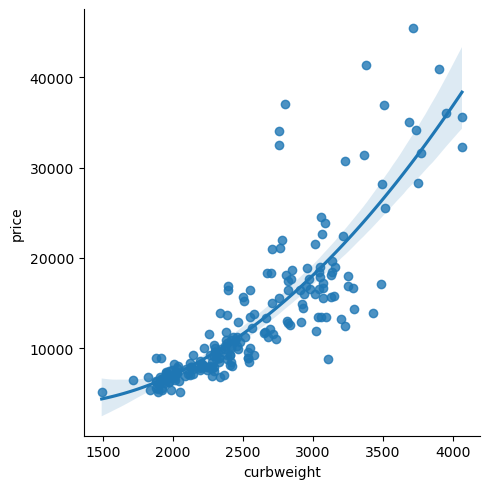

In [102]:
# anyways moving on
# lets visualize the relationship for two of the variables that we are suspicious might be order of 2

sns.lmplot(x = "curbweight", y = "price", data = data_v2, order = 2)

# definitely looks more like order 2

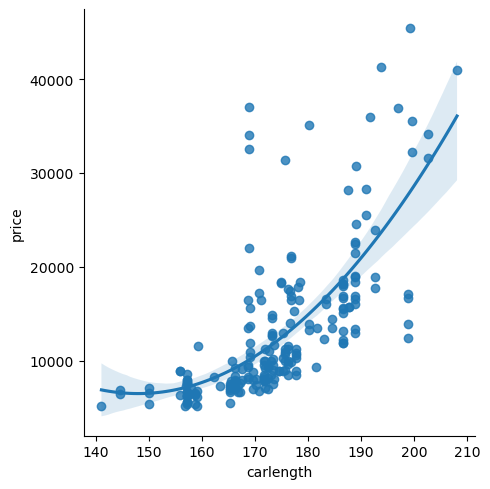

In [103]:
sns.lmplot(x = "carlength", y = "price", data = data_v2, order = 2)

# carlength also looks like order 2 

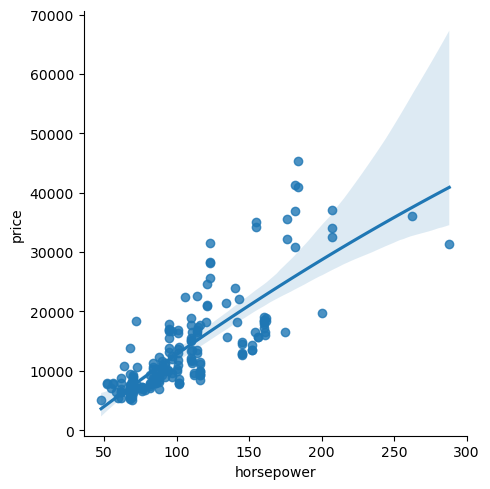

In [104]:
sns.lmplot(x = "horsepower", y = "price", data = data_v2, order = 2)

# a little less sure about horsepower being order 2

In [105]:
x_v2train, x_v2test, y_v2train, y_v2test = train_test_split(x_v2, y_v2, test_size = 0.3, random_state = 42)

print(x_v2train.shape[0])
print(x_v2test.shape[0])

143
62


In [106]:
lm_v2 = LinearRegression()

In [107]:
lm_v2.fit(x_v2train, y_v2train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [108]:
predicted_v2 = lm_v2.predict(x_v2test)

In [109]:
print(lm_v2.score(x_v2train, y_v2train))
print(lm_v2.score(x_v2test, y_v2test))

# excellent r squared scores
# model explains 92.6% of variance in the target variable on the training set
# model explains 84.7% of variance in the target variable on the unseen data (testing set)

0.9262722224294516
0.8471124710247699


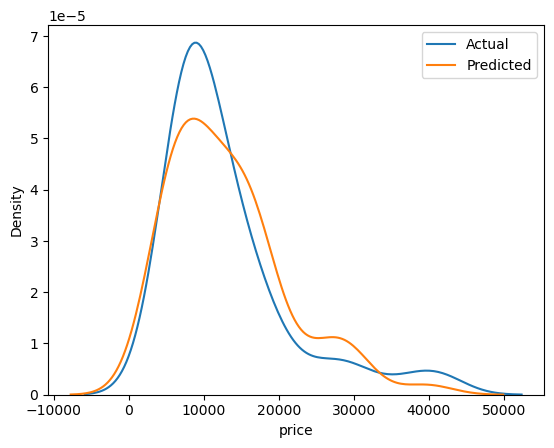

In [110]:
sns.kdeplot(y_v2test, label = "Actual")
sns.kdeplot(predicted_v2, label = "Predicted")
plt.legend()

# smoothed density curves
# doesnt look too bad

In [111]:
{col:coef for col, coef in zip(x_v2.columns, lm_v2.coef_)}


{'diesel': np.float64(771.2244282150683),
 'gas': np.float64(-771.2244282157681),
 'std': np.float64(304.3744402574276),
 'turbo': np.float64(-304.374440257828),
 'convertible': np.float64(1786.6475218550702),
 'hardtop': np.float64(3165.4520401898008),
 'hatchback': np.float64(-1770.765837027091),
 'sedan': np.float64(-687.6843494231466),
 'wagon': np.float64(-2493.649375594575),
 '4wd': np.float64(-605.6774561371768),
 'fwd': np.float64(-270.98795084606587),
 'rwd': np.float64(876.6654069832723),
 'dohc': np.float64(2467.021749084781),
 'dohcv': np.float64(-13286.45996329856),
 'l': np.float64(2148.2366151591013),
 'ohc': np.float64(4642.428500883011),
 'ohcf': np.float64(6068.75177523218),
 'ohcv': np.float64(-2819.9527705508995),
 'rotor': np.float64(779.9740934903714),
 'eight': np.float64(9218.442191847384),
 'five': np.float64(-2742.7285350010598),
 'four': np.float64(-5338.369710822215),
 'six': np.float64(-2146.2003214580386),
 'three': np.float64(-1.8189894035458565e-12),
 't

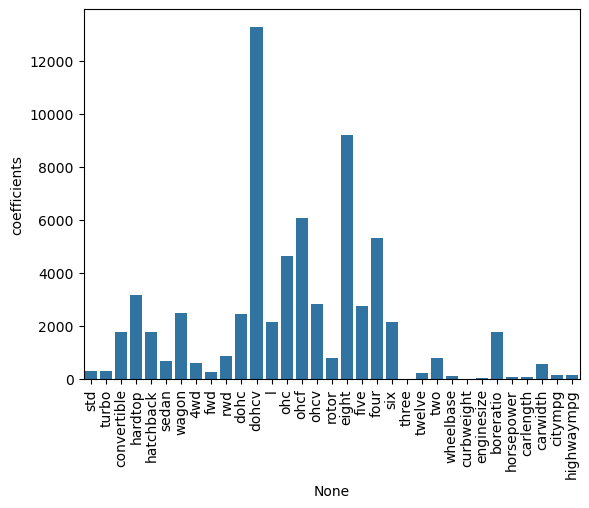

In [112]:
# lets drop the first two columns for now

sns.barplot(x = x_v2.columns[2:], y = abs(lm_v2.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("coefficients")
plt.show()

# by the way this graph is misleading because the features are not standardized (scaled). so basically large numerical values need a 
# smaller coefficient and smaller values need a larger coefficient meaning this coefficient value graph doesnt mean much

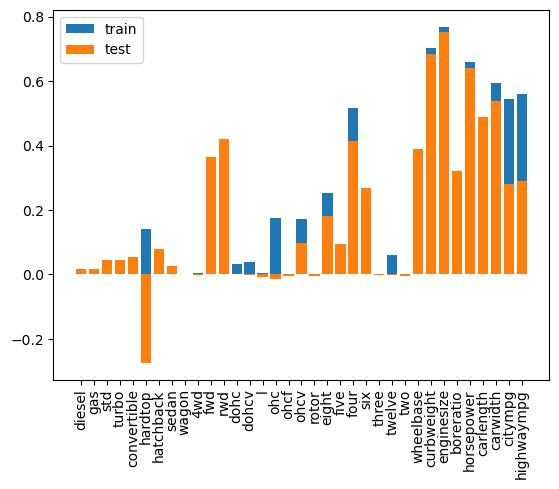

Training R^2 mean value 0.21194408471824264 Testing R^2 mean value 0.17712476737177602 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506854 


In [113]:
R_2_train = []
R_2_test = []

for feature in list(x_v2):
    lm_v2.fit(x_v2train[[feature]], y_v2train)

    R_2_test.append(lm_v2.score(x_v2test[[feature]], y_v2test))
    R_2_train.append(lm_v2.score(x_v2train[[feature]], y_v2train))

# get the r2 score for each feature in train and test
# note this will permanently change lm_v2 model to be fit only on the last feature this for loop passes through

plt.bar(list(x_v2), R_2_train, label="train")
plt.bar(list(x_v2), R_2_test, label="test")
plt.xticks(rotation=90)
plt.legend()
plt.show()

print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))))
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))))



In [114]:
# we can see some individual features such as engine size have a high R2 by themselves which is close to the R2 for using all the 
# features together. This indicates that those features are strong predictors by themselves

# in general it looks like the smaller coefficients from lm_v2.coef_ seems to give a large R2 (good predictors)
# in general it looks like the larger coefficients from lm_v2.coef_ seems to give a small R2 (bad predictors -> overfitting)

In [116]:
features = list(x_v2) 
best=features[np.argmax(R_2_train)]
best

# looks like enginesize has the best R_2 value which makes sense when you look at the graph

'enginesize'

In [117]:
from sklearn.preprocessing import PolynomialFeatures

In [118]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

# lets increase the complexity of our model while being wary of overfitting

In [119]:
x_v2train_poly = poly_features.fit_transform(x_v2train)
x_v2test_poly = poly_features.fit_transform(x_v2test)


In [120]:
print(x_v2train_poly.shape)
x_v2train.shape


(143, 665)


(143, 35)

In [121]:
x_v2test_poly.shape

(62, 665)

In [122]:
lm_v2.fit(x_v2train_poly, y_v2train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [123]:
predicted_v2 = lm_v2.predict(x_v2train_poly)

# here we predict on x_v2train_poly and not test to see if theres overfitting by seeing the R2 value

In [124]:
print(lm_v2.score(x_v2train_poly, y_v2train))

print(lm_v2.score(x_v2test_poly, y_v2test))

# the huge negative R2 value on the test set is a sign that there is an insane amount of overfitting

0.9985318497975849
-36729.95808218228


In [125]:
pipe = Pipeline(
    [('polynomial', PolynomialFeatures(degree = 2, include_bias = False)), 
     ('model', LinearRegression())])

# create a pipeline that does polynomialfeatures and linearregression

In [126]:
pipe.fit(x_v2train, y_v2train)

,steps,"[('polynomial', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [127]:
print(pipe.score(x_v2train, y_v2train))
print(pipe.score(x_v2test,y_v2test))

# the huge negative R2 value on the test set is a sign that there is an insane amount of overfitting

0.9985318497975849
-36729.95808218228


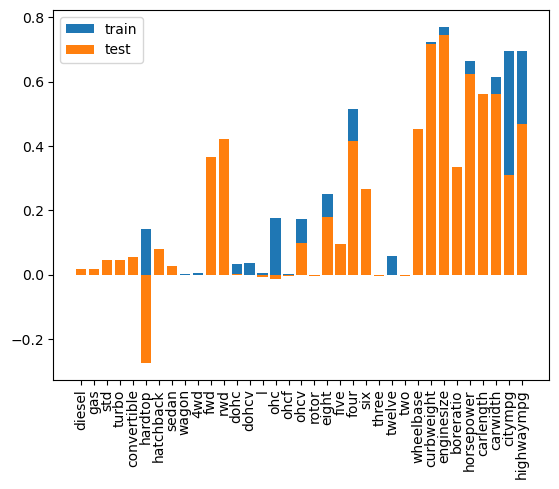

Training R^2 mean value 0.22424595021684537 Testing R^2 mean value 0.18824531434782774 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614307 


In [128]:
R_2_train = []
R_2_test = []




for feature in list(x_v2):

    pipe.fit(x_v2train[[feature]], y_v2train)
    R_2_test.append(pipe.score(x_v2test[[feature]], y_v2test))
    R_2_train.append(pipe.score(x_v2train[[feature]], y_v2train))

# get the r2 score for each feature in train and test
# note this will permanently change pipe model to be fit only on the last feature this for loop passes through

plt.bar(list(x_v2), R_2_train, label="train")
plt.bar(list(x_v2), R_2_test, label="test")
plt.xticks(rotation=90)
plt.legend()
plt.show()


print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))))
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))))

In [129]:
# the R^2 values are a little better so fitting a linear regression on the variable and variable^2 may be better
# we need to look at the performance on the test set to be aware of overfitting

# also because the max value is way higher than the mean, then that means that there are a lot of unnecessary features that are not
# predicting the model very well

In [130]:
pipe = Pipeline(
    [('polynomial', PolynomialFeatures(degree = 2, include_bias = False)), 
     ('scaler', StandardScaler()),
     ('model', LinearRegression())])

pipe.fit(x_v2train, y_v2train)

# adding a scaler here and then refitting

,steps,"[('polynomial', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid = {'polynomial__degree' : [1,2,3]}

search = GridSearchCV(pipe, param_grid, n_jobs = 1)

In [133]:
search.fit(x_v2train, y_v2train)

,estimator,Pipeline(step...egression())])
,param_grid,"{'polynomial__degree': [1, 2, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,1


In [134]:
best = search.best_estimator_
best

# by expanding PolynomialFeatures we can see that degree = 1 had the best performance.

,steps,"[('polynomial', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,1
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [135]:
best.score(x_v2test, y_v2test)

# great score

0.8419174509630336

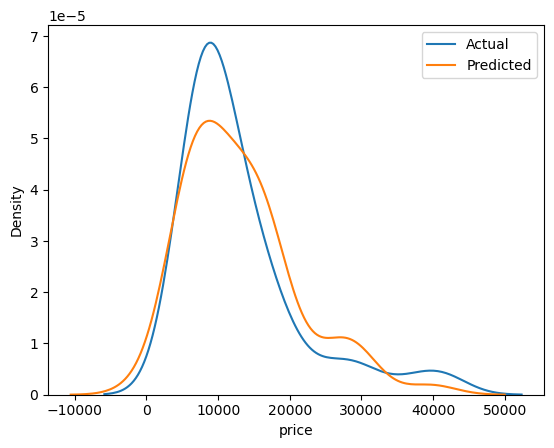

In [136]:
predicted_v2 = best.predict(x_v2test)
sns.kdeplot(y_v2test, label = "Actual")
sns.kdeplot(predicted_v2, label = "Predicted")
plt.legend()

# best model graphed against actual values.

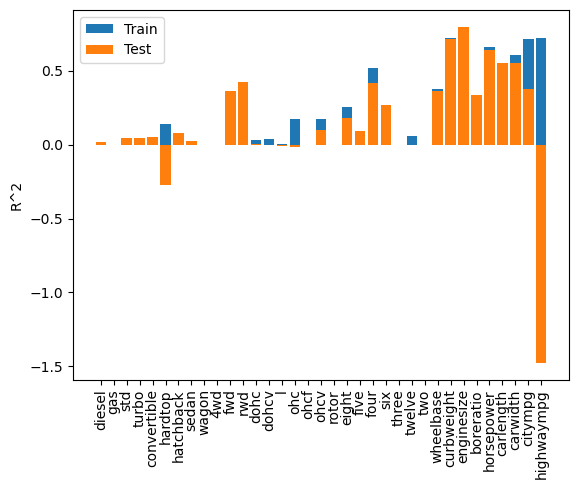

Training R^2 mean value 0.2265015413439954 Testing R^2 mean value 0.13263989214609337 
Training R^2 max value 0.7871440212620878 Testing R^2 max value 0.7978026239432493 


In [137]:
features=list(x_v2)


R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],

    # we are trying degrees up to 5
        
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(x_v2train[[feature]], y_v2train)
    best=search.best_estimator_
    
    R_2_test.append(best.score(x_v2test[[feature]],y_v2test))
    R_2_train.append(best.score(x_v2train[[feature]],y_v2train))


plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("R^2")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )


# finding the best degree (from degrees 1, 2, 3, 4, 5) based on cross validation
# the highwaympg result is strange. I think it's because:
# Beforehand, even if degree=2 looked great for highwaympg in a single train/test split, GridSearch is optimizing:
# average CV performance on the training set (default 5-fold CV)
# If degree=2 is slightly unstable (overfits some folds), CV might pick degree=1 or degree=3, etc.

In [138]:
# lets look at ridge, lasso, and elastic net regressions now

In [139]:
# lets recreate our cleaned data set starting point after one hot encoding

In [140]:
x_v3 = x.drop(["category_Budget", "category_Luxury", "category_Mid_Range"], axis = 1)

In [141]:
data_v3 = pd.concat([x_v2, original_data["price"]], axis=1)

In [142]:
y_v3 = original_data["price"].copy()

In [143]:
train_v3, test_v3 = train_test_split(data_v3, test_size = 0.3, random_state = 42)

In [144]:
skew_vals = train_v3.skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             )

skew_cols

,Skew
twelve,11.958261
dohcv,11.958261
rotor,8.365335
two,8.365335
hardtop,5.786147
eight,5.786147
convertible,5.117056
five,5.117056
4wd,5.117056
ohcf,3.905574


In [145]:
# only skew the skew values that are higher than abs(0.75). manually only check the non one hot encoded columns as the majority of the
# columns are one hot encoded right now

# these columns will be: wheelbase, enginesize, horsepower, carwidth

Text(0.5, 1.0, 'After: Log(Enginesize) (Reduced Skew)')

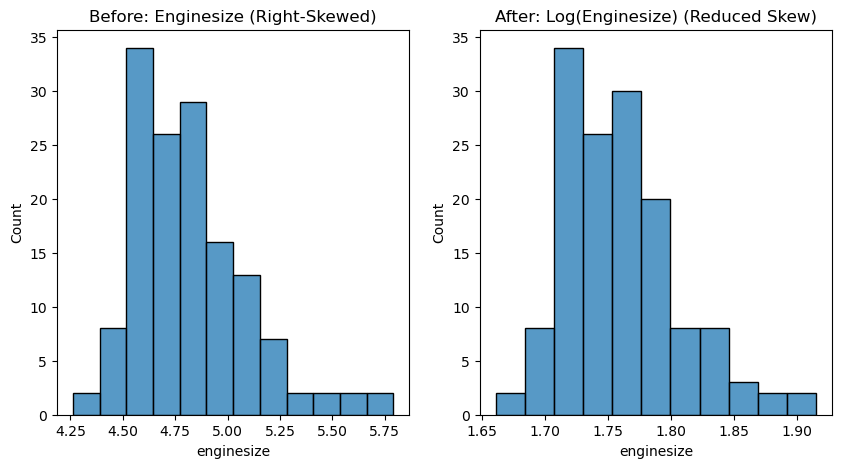

In [179]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
sns.histplot(x = train_v3["enginesize"])
plt.title("Before: Enginesize (Right-Skewed)")

enginesize_log1p = train_v3["enginesize"].apply(np.log1p)
plt.subplot(1,2,2)
sns.histplot(x = enginesize_log1p)
plt.title("After: Log(Enginesize) (Reduced Skew)")

# see a before and after example for the most skewed feature enginesize. the feature was heavily right skewed and is now less right skewed
# after log1p



In [171]:
from scipy.stats import skew

In [172]:
print("Before skew:", skew(data["enginesize"]))
print("After skew:", skew(np.log1p(data["enginesize"])))

Before skew: 1.9333748457840114
After skew: 0.8583663904343719


In [147]:
skew_these = ["wheelbase", "enginesize", "horsepower", "carwidth"]
skew_these

['wheelbase', 'enginesize', 'horsepower', 'carwidth']

In [148]:
for col in skew_these:
    if col == "price":
        continue
    train_v3[col] = np.log1p(train_v3[col])
    test_v3[col] = np.log1p(test_v3[col])

# for loop to apply log1p to all the columns that have a skew value more than 0.75. we are skipping price as that is the response variable

In [149]:
feature_cols = []
for x in train_v3.columns:
    if x != "price":
        feature_cols.append(x)

In [150]:
x_v3train = train_v3[feature_cols]
y_v3train = train_v3["price"]

x_v3test = test_v3[feature_cols]
y_v3test = test_v3["price"]


In [151]:
def rmse(y_v3true, y_v3predicted):
    return np.sqrt(mean_squared_error(y_v3true, y_v3predicted))

# create a function that returns root mean squared error so we dont have to do it every time

In [152]:
# first lets fit a basic regression model and find its rmse and its r squared

lr_v3 = LinearRegression().fit(x_v3train, y_v3train)


rmse_scores = cross_val_score(lr_v3, x_v3train, y_v3train, scoring = "neg_mean_squared_error", cv = 4)

rmse_scores = np.sqrt(-rmse_scores)
print(rmse_scores.mean())
# rmse
r2_scores = cross_val_score(lr_v3, x_v3train, y_v3train, scoring = "r2", cv = 4)
print(r2_scores.mean())
# r squared


4018.719863442916
0.7150368352519321


In [153]:
from sklearn.linear_model import RidgeCV

In [154]:
# now lets try ridge regression 

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas = alphas,
                  cv = 4).fit(x_v3train, y_v3train)

ridgeCV_rmse = rmse(y_v3test, ridgeCV.predict(x_v3test))

print(ridgeCV.alpha_, ridgeCV_rmse)
# best alpha and rmse
ridgeCV.score(x_v3test, y_v3test)
# r squared

# alpha = 1 is the best one here

1.0 3999.9999263939967


0.7690677215867002

In [155]:
from sklearn.linear_model import LassoCV

In [156]:
# now lets try lasso regression

alphas2 = [1e-5, 5e-5, 0.0001, 0.0005]

lassoCV = LassoCV(alphas = alphas2,
                  max_iter = 1000000,
                  cv = 4).fit(x_v3train, y_v3train)

lassoCV_rmse = rmse(y_v3test, lassoCV.predict(x_v3test))

print(lassoCV.alpha_, lassoCV_rmse)
# best alpha and rmse
lassoCV.score(x_v3test, y_v3test)
# r squared

# looks like 0.0005 was best alpha

0.0005 3711.1725775470013


0.8012134599978203

In [157]:
print(len(lassoCV.coef_))
# how many coefficients there are total
print(len(lassoCV.coef_.nonzero()))
# how many were turned to 0

# looks like only 1 was turned to 0

35
1


Text(0.5, 1.0, 'Predicted vs. Actual (Lasso)')

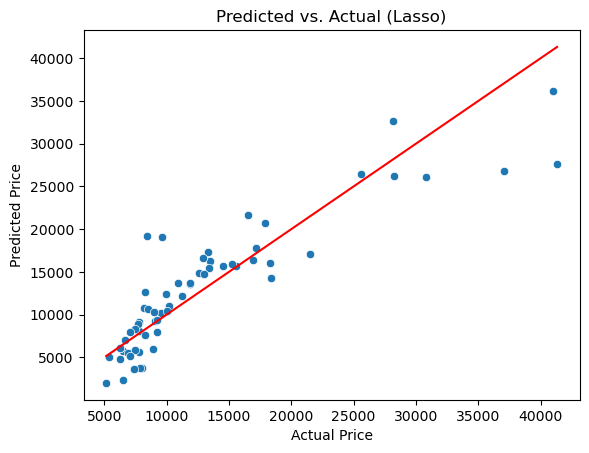

In [169]:
sns.scatterplot(x = y_v3test, y = lassoCV.predict(x_v3test))
# scatterplot of predicted vs actual

line = np.linspace(y_v3test.min(), y_v3test.max(), 100)
plt.plot(line, line, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs. Actual (Lasso)")

In [158]:
# now lets try elastic net

In [159]:
from sklearn.linear_model import ElasticNetCV

In [160]:
l1ratios = np.linspace(0.1,0.9,9)

elasticNetCV = ElasticNetCV(alphas = alphas2,
                            l1_ratio = l1ratios,
                            cv = 4, max_iter = 1000000).fit(x_v3train, y_v3train)

elasticNetCV_rmse = rmse(y_v3test, elasticNetCV.predict(x_v3test))
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)
# best alpha, best l1ratio, and rmse
print(elasticNetCV.score(x_v3test, y_v3test))
# r squared

# looks like the best alpha was 0.0005, best l1ratio was 0.1

0.0005 0.1 3724.308974694522
0.7998036842213596


In [161]:
rmse_vals = [rmse_scores.mean(), ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

r2_vals = [r2_scores.mean(), ridgeCV.score(x_v3test, y_v3test), lassoCV.score(x_v3test, y_v3test), elasticNetCV.score(x_v3test, y_v3test)]

labels = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']

rmse_r2_df = pd.DataFrame({
    "RMSE": rmse_vals,
    "R Squared": r2_vals
}, index = labels)
# make a table to easily compare and collect all the values together

rmse_r2_df

# at a glance it looks like Lasso was the highest performing and Elastic Net was close behind
# with linear being the worst performing

,RMSE,R Squared
Linear,4018.719863,0.715037
Ridge,3999.999926,0.769068
Lasso,3711.172578,0.801213
Elastic Net,3724.308975,0.799804


In [162]:
# lets try stochastic gradient descent

In [163]:
from sklearn.linear_model import SGDRegressor

In [164]:
model_parameter_dict = {
    'Linear': {'penalty':None},
    'Ridge': {'penalty' : 'l2', 'alpha' : ridgeCV.alpha_},
    'Lasso': {'penalty' : 'l1', 'alpha' : lassoCV.alpha_},
    'Elastic Net': {'penalty' : 'elasticnet', 'alpha' : elasticNetCV.alpha_, 'l1_ratio' : elasticNetCV.l1_ratio_}
}

In [165]:
new_rmses = {}

for model, parameters in model_parameter_dict.items(): 
    SGD = SGDRegressor(**parameters)
    SGD.fit(x_v3train, y_v3train)
    new_rmses[model] = rmse(y_v3test, SGD.predict(x_v3test))

rmse_r2_df["RMSE-SGD"] = pd.Series(new_rmses)
rmse_r2_df

# not scaled data.
# so RMSE is terrible

,RMSE,R Squared,RMSE-SGD
Linear,4018.719863,0.715037,8.819148e+15
Ridge,3999.999926,0.769068,1.135121e+15
Lasso,3711.172578,0.801213,4.232115e+14
Elastic Net,3724.308975,0.799804,4.362552e+14


In [166]:


new_rmses = {}

for model, parameters in model_parameter_dict.items(): 
    SGD = SGDRegressor(eta0 = 1e-7, **parameters)
    SGD.fit(x_v3train, y_v3train)
    new_rmses[model] = rmse(y_v3test, SGD.predict(x_v3test))

rmse_r2_df["RMSE-SGD-learningrate"] = pd.Series(new_rmses)
rmse_r2_df

# still no scaled data but we forced smaller gradient size which makes the rmse much better.

,RMSE,R Squared,RMSE-SGD,RMSE-SGD-learningrate
Linear,4018.719863,0.715037,8.819148e+15,6215.872540
Ridge,3999.999926,0.769068,1.135121e+15,7027.997188
Lasso,3711.172578,0.801213,4.232115e+14,6193.505319
Elastic Net,3724.308975,0.799804,4.362552e+14,6361.251768


In [167]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
new_rmses = {}

scaler = MinMaxScaler()
x_v3train_scaled = scaler.fit_transform(x_v3train)
x_v3test_scaled = scaler.transform(x_v3test)

for model, parameters in model_parameter_dict.items(): 
    SGD = SGDRegressor(**parameters)
    SGD.fit(x_v3train_scaled, y_v3train)
    new_rmses[model] = rmse(y_v3test, SGD.predict(x_v3test_scaled))

rmse_r2_df["RMSE-SGD-scaled"] = pd.Series(new_rmses)
rmse_r2_df

# finally scaled data which makes the RMSE much much better. SGD + scaled still slightly worse than regular OLS (linear) without scaling.

,RMSE,R Squared,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,4018.719863,0.715037,8.819148e+15,6215.872540,4184.483735
Ridge,3999.999926,0.769068,1.135121e+15,7027.997188,6058.461335
Lasso,3711.172578,0.801213,4.232115e+14,6193.505319,4192.218592
Elastic Net,3724.308975,0.799804,4.362552e+14,6361.251768,4182.733724
